In [257]:
import pandas as pd
import json       
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

**FUNCTIONS**

In [ ]:
def NaN_to_list(data, column_name):
    '''
    When dealing with a column which consist of lists, we need to change
    the type of NaNs from 'float' to 'list' in order to perform iterative 
    operations. This function detects NaNs and creates an empty list for
    missing rows.
    '''
    # Create a boolean vector for indexing
    NaN_rows = data[column_name].isnull()
    
    # Change the type of NaNs from 'float' to (empty) 'list'
    data.loc[NaN_rows, column_name] = data.loc[NaN_rows, column_name].apply(lambda x: [])

In [291]:
import function

In [292]:
%run -i "function.py"

In [293]:
# %load "function.py"

In [3]:
def name_columns(data):
    '''
    Name columns according to the underscore(_) convention.
    '''
    # Clean "\n"s from the column names
    data.columns = data.columns.str.strip("\n")
    # Make lowercase
    data.columns = data.columns.str.lower()
    # Replace space with underscore(_)
    data.columns = data.columns.str.replace(" ", "_")
    # Replace . with ""
    data.columns = data.columns.str.replace(".", "")
    # Replace "_&_" with "&"
    data.columns = data.columns.str.replace("_&_", "_")
    # Replace "-" with "_"
    data.columns = data.columns.str.replace("-", "_")
    data.columns = data.columns.str.replace("/", "_")
    return data.columns

In [4]:
def column_ocupancy_rate(data):
    total = data.isnull().sum().sort_values(ascending=True)
    percent =1-(data.isnull().sum()/data.isnull().count()).sort_values(ascending=True) 
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data.head(135)

**DEF TURGUT**

In [8]:
def clean_t (data):
    
    # Select columns to clean
    df = data
   
    # Create dummies using the items in the list of 'safety&security' column
    df_new = df.join(df['safety_security'].str.join('|').str.get_dummies().add_prefix('ss_'))
    # Drop 'safety_security' column
    df_new.drop('safety_security', axis=1, inplace=True)
   
    # Clean the model column
    df_new['model'] = df.model.apply(lambda x: x[1])
    
    # Strip "\n"s from the 'make' column
    df_new['make'] = df.make.str.strip("\n")
    
    # Drop unnecesary column 'make_model'
    df_new.drop(columns = "make_model", inplace = True)
    
    # Clean 'model_code' column
    df_new.loc[df_new.model_code.notnull(), "model_code"] = df.model_code[df.model_code.notnull()].apply(lambda x: str(x)[4:-4])
    
    # Clean 'country_version' column
    df_new.loc[df_new.country_version.notnull(), "country_version"] = df.country_version[df.country_version.notnull()].apply(lambda x: str(x)[4:-4])
    
    # Clean 'co2_emission' column
    df_new['co2_emission'] = df.co2_emission.str[0].str.extract(r'(\d+)')
    # Change the 'co2' columns data type to numeric
    df_new['co2_emission'] = pd.to_numeric(df_new.co2_emission)
    
    # Clean 'cylinders' column
    df_new['cylinders'] = df.cylinders.str[0].str.extract(r'(\d+)')
    # Change the 'cylinders' columns data type to numeric
    df_new['cylinders'] = pd.to_numeric(df_new['cylinders'])
    
    # Extract discplacement values (and remove commas)
    df_new['displacement'] = df.displacement.str[0].str.replace(",","").str.extract(r'(\d+)')
    
    # Extract 'next_inspection' values
    df_new.next_inspection = df.next_inspection.str[0].str.strip("\n")
    # Create a boolean column from `next_inspection`
    df_new['next_inspection_bool'] = df_new.next_inspection.notnull()
    
    # Drop 'non-smoking_vehicle' column
    df_new.drop("non_smoking_vehicle", axis=1, inplace=True)
    
    # Extract hp from 'hp' column
    df_new['hp'] = df.hp.str.extract(r'(\d+)')
    
    # Drop 'kw' column
    df_new.drop('kw', axis=1, inplace=True)
    
    # Clean 'km' column
    df_new['km'] = df.km.str.replace(",", "").str.extract(r'(\d+)')
    
    # Clean "offer_number' column
    df_new['offer_number'] = df.offer_number.str[0].str.replace("\n","")
    
    # Create a boolean for checking "combined" consumption
    comb_bool = df.consumption.str[0].str[0].str.contains("comb", na=False)
    # Create a new column for 'consumption_comb'
    df_new['consumption_comb'] = df[comb_bool].consumption.str[0].str[0].str.extract(r'(\d.\d|\d)')
    # Drop 'consumption' column
    df_new.drop('consumption', axis=1, inplace=True)
    
    # Tidy column names
    df_new.columns = name_columns(df_new)
    
    return df_new

**DEF METIN**

In [9]:
def clean_m(data):
    df=data
    #cleaning registration column and convertinf it to age column
    reg_new = df.registration[~df.registration.str.contains("-")]
    reg_new = pd.to_datetime(reg_new, format='%m/%Y')
    reg_year = reg_new.apply(lambda x: x.year)
    df['age'] = 2019 - reg_year
    
    df['gearing_type'] = df['gearing_type'].apply(lambda x:x[1])
    
    df.loc[df['body'].notnull(), 'body'] = df.loc[df['body'].notnull(), 'body'].apply(lambda x: x[1])
    
    df.loc[df['body_color'].notnull(), 'body_color'] = df.loc[df['body_color'].notnull(), 'body_color'].apply(lambda x: x[1])
         
    df=df.join(df['entertainment_media'].str.join('|').str.get_dummies().add_prefix('entertainment_media_'))
    
    df['gears']=df.gears.str[0].str.replace("\n", "")
    
    df['paint_type']=df.paint_type.str[0].str.replace("\n", "")
    
    # converting inspection_new column to 1 if it contains Yes expression, else: 0
    df["inspection_new"] = df.inspection_new.str[0].str.contains("Yes", na=False)*1
     
    # extracting the number of days in availabiltiy column and converting column name to available_after_days
    df['availability'] = df.availability.str.extract(r'(\d+)')
    df['available_after_days'] = df.availability.apply(pd.to_numeric)
    
    # finding right pattern for date in a mixed column: 2 digits/4 digits to extract the date
    df['last_service_date'] = df.last_service_date.str[0].str.extract(r'(\d{2}\/\d{4})')
    # converting to datetime object
    df['last_service_date'] = pd.to_datetime(df['last_service_date'], format='%m/%Y')
    
    #cleaning the available_from column and converting to datetime
    df['available_from'] = df.available_from.str.strip("\n")
    df['available_from'] = pd.to_datetime(df['available_from'])
        
    name_columns(df)
    
    drop_list=['availability', 'body_color_original', 'full_service',
       'last_timing_belt_service_date', 'null', 'registration', 'short_description']
    df.drop(drop_list, axis=1, inplace=True)
    df.columns=df.columns.str.translate({ord('\n'): None})
    
    return df

**DEF VOLKAN**

In [10]:
def clean_v(data):
    df_v=data
    # Standardisation of column names
    df_v.columns = [x.casefold().strip().replace(" ","_").replace("_&_","_").replace(".","").replace("-", "_") for x in df_v.columns]
    
    # Create dummies using the items in the list of 'safety&security' column
    df_v = df_v.join(df_v['comfort_convenience'].str.join('|').str.get_dummies().add_prefix('cc_'))
    df_v.head()
    # Create dummies using the items in the list of 'safety&security' column
    df_v = df_v.join(df_v['extras'].str.join('|').str.get_dummies().add_prefix('ext_'))
    df_v.head()
    #cleaning and reassigning "drive_chain" column
    chain = df_v.drive_chain
    chain_str = [item[0].strip() if type(item) == list else item for item in chain]
    df_v.drive_chain = pd.DataFrame(chain_str)
    #cleaning and reassigning "electricity_consumption" column
    electricity = [item[0].strip() if type(item) == list else item for item in df_v.electricity_consumption]
    df_v.electricity_consumption = pd.DataFrame(electricity)
    #cleaning and reassigning "emission_class" column 1/3
    emis = df_v['emission_class']
    #cleaning and reassigning "emission_class" column 2/3
    emis_list = []
    for item in emis:
        if type(item) == list:
            if len(item[0]) >= 1:
                emis_list.append(item[0].strip())
            else:
                emis_list.append(np.nan)
        else:
            emis_list.append(np.nan)
    #cleaning and reassigning "emission_class" column 3/3
    df_v.emission_class = pd.DataFrame(emis_list)
    #cleaning and reassigning "emission_label" column 1/3
    emlabel = df_v.emission_label
    #cleaning and reassigning "emission_label" column 2/3
    emlabel_list = []
    for item in emlabel:
        if type(item) == list:
            if len(item[0]) >= 1:
                emlabel_list.append(item[0].strip())
            else:
                emlabel_list.append(np.nan)
        else:
            emlabel_list.append(np.nan)
    #cleaning and reassigning "emission_label" column 3/3
    df_v.emission_label = pd.DataFrame(emlabel_list)
    #cleaning and reassigning "first_registration" column 1/3
    freg = df_v.first_registration
    #cleaning and reassigning "first_registration" column 2/3
    freg_list = ["".join(item).strip() if type(item) == list else item for item in freg]
    df_v.first_registration = pd.DataFrame(freg_list)
    
    #cleaning and reassigning "fuel" column 1/3
    fuel = df_v.fuel
    fuel_list = ["".join(item).strip() if type(item) == list else item for item in fuel]
    df_v.fuel = pd.DataFrame(fuel_list)
    #cleaning and reassigning "nr_of_doors" column 1/3
    doors = df_v.nr_of_doors
    doors_list = [item[0].strip() if type(item) == list else item for item in doors]
    df_v.nr_of_doors = pd.DataFrame(doors_list)
    #cleaning and reassigning "nr_of_seats" column 1/3
    seats = df_v.nr_of_seats
    seats_list = [item[0].strip() if type(item) == list else item for item in seats]
    df_v.nr_of_seats = pd.DataFrame(seats_list)
    #cleaning and reassigning "previous_owners" column 1/3
    pre_own = df_v.previous_owners
    pre_list = [item[0].strip() if type(item) == list else item.strip() if type(item) == str else item for item in pre_own]
    df_v.previous_owners = pd.DataFrame(pre_list)
    #cleaning and reassigning "type" column 1/3
    types = df_v.type
    types_list = [item[1].strip() if type(item) == list else item for item in types]
    df_v.type = pd.DataFrame(types_list)
    #cleaning and reassigning "upholstery" column 1/3
    uph = df_v.upholstery
    uph_list = ["_".join(item).strip() if type(item) == list else item for item in uph]
    df_v.upholstery = pd.DataFrame(uph_list)
    #cleaning and reassigning "warranty" column 1/3
    #regarding the design of the website we need to handle this column a bit special.
    #if there is a value in the row that means there is a warranty if NaN it means no warranty.
    # so we will use "0" for missing values and "1" for the others 
    war = df_v.warranty
    war_list = [0 if type(item) == float else 1 for item in war]
    df_v.warranty = pd.DataFrame(war_list)
    #cleaning and reassigning "weight" column 1/3
    wei = df_v.weight
    wei_list = [item[0].replace(",","").strip().rstrip(" gk") if type(item) == list else item for item in wei]
    #cleaning and reassigning "weight" column 3/3
    #removing also "kg" string and changing column name as "weight_kg"
    #so we can drop "weight" column also
    df_v["weight_kg"] = pd.DataFrame(wei_list)
    #cleaning and reassigning "prev_owner" column 1/3
    powner = df_v.prev_owner
    powner_list = [item.split()[0] if type(item) == str else item for item in powner]
    df_v.prev_owner = pd.DataFrame(powner_list)
    columns_to_drop = [ "electricity_consumption", "other_fuel_types", "weight", "comfort_convenience", "extras", ]
    # Drop unnecesary columns
    df_v.drop(columns_to_drop, axis=1, inplace=True)
 
    # Standardisation of column names
    df_v.columns = [x.casefold().strip().replace(" ","_").replace("_&_","_").replace(".","").replace("-", "_") for x in     df_v.columns]
    
    return df_v

In [11]:
data = []
with open('scout_3models.json') as f:
    for line in f:
        data.append(json.loads(line))       
autos = pd.DataFrame(data)
name_columns(autos)
pd.options.display.max_columns=None

In [12]:
v_cols=['comfort_convenience', 'extras', 'drive_chain',
       'electricity_consumption', 'emission_class', 'emission_label',
       'first_registration', 'fuel', 'nr_of_doors', 'nr_of_seats',
       'other_fuel_types', 'previous_owners', 'type', 'upholstery', 'warranty',
       'weight', 'prev_owner', 'url']

In [13]:
m_cols =['entertainment_media', 'availability', 'available_from', 'body',
       'body_color', 'body_color_original', 'full_service', 'gearing_type', 'gears',
       'inspection_new', 'last_service_date', 'last_timing_belt_service_date', 'paint_type',
       'null', 'price', 'registration', 'short_description', 'vat']

In [14]:
t_cols = ['safety_security', 'co2_emission', 'consumption', 'country_version', 
          'cylinders', 'displacement', 'make', 'model', 'model_code', 'next_inspection',
          'non_smoking_vehicle', 'body_type', 'description', "hp", 'kw', 'km', "make_model", 
          "offer_number"]

In [258]:
df_m = clean_m(autos[m_cols])

In [16]:
df_t = clean_t(autos[t_cols])

In [17]:
df_v=clean_v(autos[v_cols])

In [18]:
df_v.shape

(15919, 69)

In [19]:
df_v.head()

,drive_chain,emission_class,emission_label,first_registration,fuel,nr_of_doors,nr_of_seats,previous_owners,type,upholstery,warranty,prev_owner,url,cc_air_conditioning,cc_air_suspension,cc_armrest,cc_automatic_climate_control,cc_auxiliary_heating,cc_cruise_control,cc_electric_starter,cc_electric_tailgate,cc_electrical_side_mirrors,cc_electrically_adjustable_seats,cc_electrically_heated_windshield,cc_heads_up_display,cc_heated_steering_wheel,cc_hill_holder,cc_keyless_central_door_lock,cc_leather_seats,cc_leather_steering_wheel,cc_light_sensor,cc_lumbar_support,cc_massage_seats,cc_multi_function_steering_wheel,cc_navigation_system,cc_panorama_roof,cc_park_distance_control,cc_parking_assist_system_camera,cc_parking_assist_system_self_steering,cc_parking_assist_system_sensors_front,cc_parking_assist_system_sensors_rear,cc_power_windows,cc_rain_sensor,cc_seat_heating,cc_seat_ventilation,cc_split_rear_seats,cc_start_stop_system,cc_sunroof,cc_tinted_windows,cc_wind_deflector,cc_windshield,ext_alloy_wheels,ext_cab_or_rented_car,ext_catalytic_converter,ext_handicapped_enabled,ext_right_hand_drive,ext_roof_rack,ext_shift_paddles,ext_ski_bag,ext_sliding_door,ext_sport_package,ext_sport_seats,ext_sport_suspension,ext_touch_screen,ext_trailer_hitch,ext_tuned_car,ext_voice_control,ext_winter_tyres,weight_kg
0,front,Euro 6,NaN,2016,Diesel (Particulate Filter),5,5,2,Used,"Cloth, Black",1,2,https://www.autoscout24.com//offers/audi-a1-sp...,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1220
1,front,Euro 6,4 (Green),2017,Gasoline,3,4,NaN,Used,"Cloth, Grey",0,None,https://www.autoscout24.com//offers/audi-a1-1-...,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1255
2,front,Euro 6,4 (Green),2016,Diesel (Particulate Filter),4,4,1,Used,"Cloth, Black",1,1,https://www.autoscout24.com//offers/audi-a1-sp...,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,NaN
3,NaN,Euro 6,NaN,2016,Diesel (Particulate Filter),3,4,1,Used,NaN,0,1,https://www.autoscout24.com//offers/audi-a1-1-...,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1195
4,front,Euro 6,NaN,2016,Diesel (Particulate Filter),5,5,1,Used,"Cloth, Black",1,1,https://www.autoscout24.com//offers/audi-a1-sp...,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,NaN


In [74]:
df_m.shape

(15919, 22)

In [20]:
df_t.shape

(15919, 44)

In [21]:
df = df_t.join(df_m)

In [22]:
df=df.join(df_v)

In [23]:
df.shape

(15919, 136)

**EDA**

In [24]:
df.head()

,co2_emission,country_version,cylinders,displacement,make,model,model_code,next_inspection,body_type,description,hp,km,offer_number,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,ss_daytime_running_lights,ss_driver_drowsiness_detection,ss_driver_side_airbag,ss_electronic_stability_control,ss_emergency_brake_assistant,ss_emergency_system,ss_fog_lights,ss_head_airbag,ss_immobilizer,ss_isofix,ss_led_daytime_running_lights,ss_led_headlights,ss_lane_departure_warning_system,ss_night_view_assist,ss_passenger_side_airbag,ss_power_steering,ss_rear_airbag,ss_side_airbag,ss_tire_pressure_monitoring_system,ss_traction_control,ss_traffic_sign_recognition,ss_xenon_headlights,next_inspection_bool,consumption_comb,entertainment_media,available_from,body,body_color,gearing_type,gears,inspection_new,last_service_date,paint_type,price,vat,age,entertainment_media_bluetooth,entertainment_media_cd_player,entertainment_media_digital_radio,entertainment_media_hands_free_equipment,entertainment_media_mp3,entertainment_media_on_board_computer,entertainment_media_radio,entertainment_media_sound_system,entertainment_media_television,entertainment_media_usb,available_after_days,drive_chain,emission_class,emission_label,first_registration,fuel,nr_of_doors,nr_of_seats,previous_owners,type,upholstery,warranty,prev_owner,url,cc_air_conditioning,cc_air_suspension,cc_armrest,cc_automatic_climate_control,cc_auxiliary_heating,cc_cruise_control,cc_electric_starter,cc_electric_tailgate,cc_electrical_side_mirrors,cc_electrically_adjustable_seats,cc_electrically_heated_windshield,cc_heads_up_display,cc_heated_steering_wheel,cc_hill_holder,cc_keyless_central_door_lock,cc_leather_seats,cc_leather_steering_wheel,cc_light_sensor,cc_lumbar_support,cc_massage_seats,cc_multi_function_steering_wheel,cc_navigation_system,cc_panorama_roof,cc_park_distance_control,cc_parking_assist_system_camera,cc_parking_assist_system_self_steering,cc_parking_assist_system_sensors_front,cc_parking_assist_system_sensors_rear,cc_power_windows,cc_rain_sensor,cc_seat_heating,cc_seat_ventilation,cc_split_rear_seats,cc_start_stop_system,cc_sunroof,cc_tinted_windows,cc_wind_deflector,cc_windshield,ext_alloy_wheels,ext_cab_or_rented_car,ext_catalytic_converter,ext_handicapped_enabled,ext_right_hand_drive,ext_roof_rack,ext_shift_paddles,ext_ski_bag,ext_sliding_door,ext_sport_package,ext_sport_seats,ext_sport_suspension,ext_touch_screen,ext_trailer_hitch,ext_tuned_car,ext_voice_control,ext_winter_tyres,weight_kg
0,99.0,NaN,3.0,1422,Audi,A1,0588/BDF,06/2021,Sedans,"[\n, Sicherheit:, , Deaktivierung für Beifahr...",66,56013,LR-062483,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,True,3.8,"[Bluetooth, Hands-free equipment, On-board com...",NaT,Sedans,Black,Automatic,NaN,1,NaT,Metallic,15770,VAT deductible,3.0,1,0,0,1,0,1,1,0,0,0,NaN,front,Euro 6,NaN,2016,Diesel (Particulate Filter),5,5,2,Used,"Cloth, Black",1,2,https://www.autoscout24.com//offers/audi-a1-sp...,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1220
1,129.0,NaN,4.0,1798,Audi,A1,0588/BCY,NaN,Sedans,[\nLangstreckenfahrzeug daher die hohe Kilomet...,141,80000,NaN,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,False,5.6,"[Bluetooth, Hands-free equipment, On-board com...",NaT,Sedans,Red,Automatic,7,0,NaT,NaN,14500,Price negotiable,2.0,1,0,0,1,0,1,1,1,0,0,NaN,front,Euro 6,4 (Green),2017,Gasoline,3,4,NaN,Used,"Cloth, Grey",0,None,https://www.autoscout24.com//offers/audi-a1-1-...,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1255
2,99.0,NaN,NaN,1598,Audi,A1,NaN,NaN,Sedans,"[\n, Fahrzeug-Nummer: AM-95365, , Ehem. UPE 2...",85,83450,AM-95365,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,False,3.8,"[MP3, On-board computer]",NaT,Sedans,Black,Automatic,NaN,0,NaT,Metallic,14640,VAT deducti

In [102]:
df.dtypes

co2_emission                                float64
country_version                              object
cylinders                                   float64
displacement                                 object
make                                         object
model                                        object
model_code                                   object
next_inspection                              object
body_type                                    object
description                                  object
hp                                           object
km                                           object
offer_number                                 object
ss_abs                                        int64
ss_adaptive_cruise_control                    int64
ss_adaptive_headlights                        int64
ss_alarm_system                               int64
ss_blind_spot_monitor                         int64
ss_central_door_lock                          int64
ss_central_d

In [25]:
(df.body_type==df.body).sample(10)

8931     True
830      True
7918     True
14129    True
5922     True
13648    True
4970     True
5072     True
10115    True
4340     True
dtype: bool

In [153]:
# body_type and body columns are identical columns. We need to drop one of them

In [26]:
df.drop(['body_type'], axis=1, inplace=True)

In [25]:
df.describe()

,co2_emission,cylinders,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,ss_daytime_running_lights,ss_driver_drowsiness_detection,ss_driver_side_airbag,ss_electronic_stability_control,ss_emergency_brake_assistant,ss_emergency_system,ss_fog_lights,ss_head_airbag,ss_immobilizer,ss_isofix,ss_led_daytime_running_lights,ss_led_headlights,ss_lane_departure_warning_system,ss_night_view_assist,ss_passenger_side_airbag,ss_power_steering,ss_rear_airbag,ss_side_airbag,ss_tire_pressure_monitoring_system,ss_traction_control,ss_traffic_sign_recognition,ss_xenon_headlights,inspection_new,price,age,entertainment_media_bluetooth,entertainment_media_cd_player,entertainment_media_digital_radio,entertainment_media_hands_free_equipment,entertainment_media_mp3,entertainment_media_on_board_computer,entertainment_media_radio,entertainment_media_sound_system,entertainment_media_television,entertainment_media_usb,available_after_days,warranty,cc_air_conditioning,cc_air_suspension,cc_armrest,cc_automatic_climate_control,cc_auxiliary_heating,cc_cruise_control,cc_electric_starter,cc_electric_tailgate,cc_electrical_side_mirrors,cc_electrically_adjustable_seats,cc_electrically_heated_windshield,cc_heads_up_display,cc_heated_steering_wheel,cc_hill_holder,cc_keyless_central_door_lock,cc_leather_seats,cc_leather_steering_wheel,cc_light_sensor,cc_lumbar_support,cc_massage_seats,cc_multi_function_steering_wheel,cc_navigation_system,cc_panorama_roof,cc_park_distance_control,cc_parking_assist_system_camera,cc_parking_assist_system_self_steering,cc_parking_assist_system_sensors_front,cc_parking_assist_system_sensors_rear,cc_power_windows,cc_rain_sensor,cc_seat_heating,cc_seat_ventilation,cc_split_rear_seats,cc_start_stop_system,cc_sunroof,cc_tinted_windows,cc_wind_deflector,cc_windshield,ext_alloy_wheels,ext_cab_or_rented_car,ext_catalytic_converter,ext_handicapped_enabled,ext_right_hand_drive,ext_roof_rack,ext_shift_paddles,ext_ski_bag,ext_sliding_door,ext_sport_package,ext_sport_seats,ext_sport_suspension,ext_touch_screen,ext_trailer_hitch,ext_tuned_car,ext_voice_control,ext_winter_tyres
count,13483.000000,10239.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,14322.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,635.000000,15919.000000,15919.00000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.00000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.00000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000
mean,117.953942,3.797343,0.887619,0.081852,0.128212,0.120736,0.081098,0.798229,0.150575,0.654061,0.031786,0.873296,0.828381,0.197940,0.099001,0.515862,0.137320,0.659526,0.737735,0.345876,0.192537,0.191846,0.004711,0.843960,0.854262,0.054400,0.829386,0.666122,0.691249,0.124128,0.222313,0.224260,18019.896727,1.542382,0.731830,0.300961,0.140021,0.584522,0.367674,0.749921,0.753125,0.140712,0.002199,0.512469,76.725984,0.659526,0.89924,0.003895,0.453860,0.549469,0.016710,0.683523,0.000063,0.

In [27]:
df.gears.dtypes

dtype('O')

In [28]:
df.gears.value_counts()

6     5822
5     3239
7     1908
8      224
9        6
1        2
3        2
4        2
50       1
2        1
Name: gears, dtype: int64

In [152]:
# gears column consist of numbers but not calculated by describe func. So let's convert it by to numeric.

In [237]:
type(df.consumption_comb[0])

str

In [ ]:
#also need to convert  consumption_comb column to numeric.

In [239]:
df['consumption_comb'] = pd.to_numeric(df.consumption_comb)

In [240]:
type(df.consumption_comb[0])

numpy.float64

In [30]:
df.gears.describe()

count    11207.000000
mean         5.924601
std          0.848158
min          1.000000
25%          5.000000
50%          6.000000
75%          6.000000
max         50.000000
Name: gears, dtype: float64

In [246]:
type(df.nr_of_doors[0])

str

In [248]:
df['nr_of_doors'] = pd.to_numeric(df.nr_of_doors)

In [249]:
type(df.nr_of_doors[0])

numpy.float64

**OCUPANCY_RATE**

In [30]:
column_ocupancy_rate(df)

,Total,Percent
entertainment_media_hands_free_equipment,0,1.000000
cc_electric_tailgate,0,1.000000
cc_electric_starter,0,1.000000
cc_cruise_control,0,1.000000
cc_auxiliary_heating,0,1.000000
cc_automatic_climate_control,0,1.000000
cc_armrest,0,1.000000
cc_air_suspension,0,1.000000
cc_air_conditioning,0,1.000000
url,0,1.000000


**PRICE**

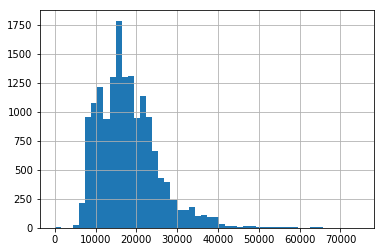

In [31]:
df['price'].hist(bins=50)

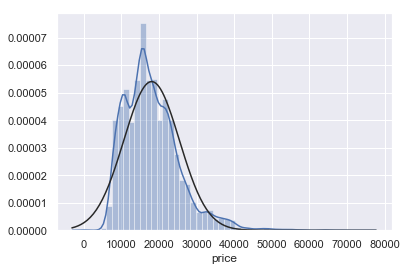

In [264]:
sns.distplot(df.price, fit=norm)

In [47]:
print("Skewness: %f" % df['price'].skew())

Skewness: 1.231883


In [33]:
print("Kurtosis: %f" % df['price'].kurt())

Kurtosis: 2.961370


In [ ]:
# 1.2>0 suggests non-normality (normal dist: skewness=0, kurtosis=3, excess kurtosis=0)
# skewed to right

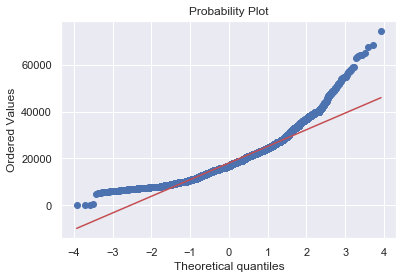

In [272]:
fig = plt.figure()
res=stats.probplot(df['price'], plot=plt)

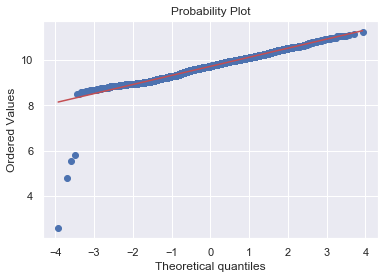

In [282]:
res=stats.probplot(np.log(df['price'].values), plot=plt)

In [34]:
df.price.describe()

count    15919.000000
mean     18019.896727
std       7386.169409
min         13.000000
25%      12850.000000
50%      16900.000000
75%      21900.000000
max      74600.000000
Name: price, dtype: float64

In [103]:
## 13 euros price for a car is interesting. So let's find the 3 cars with lowest price 

In [288]:
df.sort_values(by = 'price', ascending = True)[:5]

,co2_emission,country_version,cylinders,displacement,make,model,model_code,next_inspection,description,hp,km,offer_number,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,ss_daytime_running_lights,ss_driver_drowsiness_detection,ss_driver_side_airbag,ss_electronic_stability_control,ss_emergency_brake_assistant,ss_emergency_system,ss_fog_lights,ss_head_airbag,ss_immobilizer,ss_isofix,ss_led_daytime_running_lights,ss_led_headlights,ss_lane_departure_warning_system,ss_night_view_assist,ss_passenger_side_airbag,ss_power_steering,ss_rear_airbag,ss_side_airbag,ss_tire_pressure_monitoring_system,ss_traction_control,ss_traffic_sign_recognition,ss_xenon_headlights,next_inspection_bool,consumption_comb,entertainment_media,available_from,body,body_color,gearing_type,gears,inspection_new,last_service_date,paint_type,price,vat,age,entertainment_media_bluetooth,entertainment_media_cd_player,entertainment_media_digital_radio,entertainment_media_hands_free_equipment,entertainment_media_mp3,entertainment_media_on_board_computer,entertainment_media_radio,entertainment_media_sound_system,entertainment_media_television,entertainment_media_usb,available_after_days,drive_chain,emission_class,emission_label,first_registration,fuel,nr_of_doors,nr_of_seats,previous_owners,type,upholstery,warranty,prev_owner,url,cc_air_conditioning,cc_air_suspension,cc_armrest,cc_automatic_climate_control,cc_auxiliary_heating,cc_cruise_control,cc_electric_starter,cc_electric_tailgate,cc_electrical_side_mirrors,cc_electrically_adjustable_seats,cc_electrically_heated_windshield,cc_heads_up_display,cc_heated_steering_wheel,cc_hill_holder,cc_keyless_central_door_lock,cc_leather_seats,cc_leather_steering_wheel,cc_light_sensor,cc_lumbar_support,cc_massage_seats,cc_multi_function_steering_wheel,cc_navigation_system,cc_panorama_roof,cc_park_distance_control,cc_parking_assist_system_camera,cc_parking_assist_system_self_steering,cc_parking_assist_system_sensors_front,cc_parking_assist_system_sensors_rear,cc_power_windows,cc_rain_sensor,cc_seat_heating,cc_seat_ventilation,cc_split_rear_seats,cc_start_stop_system,cc_sunroof,cc_tinted_windows,cc_wind_deflector,cc_windshield,ext_alloy_wheels,ext_cab_or_rented_car,ext_catalytic_converter,ext_handicapped_enabled,ext_right_hand_drive,ext_roof_rack,ext_shift_paddles,ext_ski_bag,ext_sliding_door,ext_sport_package,ext_sport_seats,ext_sport_suspension,ext_touch_screen,ext_trailer_hitch,ext_tuned_car,ext_voice_control,ext_winter_tyres,weight_kg,hp2,km2,km_new,hp_new,price_log
8594,128.0,NaN,4.0,1398,Opel,Corsa,1844/ADJ,NaN,[],66.0,123.0,NaN,1,0,1,0,0,0,1,1,0,1,1,0,0,1,1,0,1,0,0,0,0,1,1,0,1,1,1,0,1,False,5.6,"[Bluetooth, CD player, Hands-free equipment, M...",NaT,Sedans,Gold,Manual,5.0,0,NaT,NaN,13,None,1.0,1,1,0,1,1,1,1,0,0,1,NaN,NaN,Euro 6d-TEMP,NaN,2018,Gasoline,3.0,5,NaN,Used,NaN,0,None,https://www.autoscout24.com//offers/opel-corsa...,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1141,0.0,123,0.0,0.0,2.564949
8828,107.0,Netherlands,3.0,999,Opel,Corsa,NaN,NaN,[\nOpel Bestaat 120 jaar en trakteert! €120 PE...,66.0,12.0,49361,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,1,1,0,0,False,4.6,"[Digital radio, On-board computer, Radio]",NaT,Compact,Grey,Manual,6.0,0,NaT,Metallic,120,None,0.0,0,0,1,0,0,1,1,0,0,0,NaN,NaN,Euro 6,NaN,2019,Gasoline,5.0,5,NaN,New,"Cloth, Black",1,None,https://www.autoscout24.com//offers/opel-corsa...,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1099,0.0,12,0.0,0.0,4.787492
6066,101.0,NaN,4.0,1598,Opel,Astra,NaN,NaN,[],100.0,5563.0,NaN,1,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,0,False,3.8,"[Bluetooth, Hands-free equipment, On-board com...",NaT,Station wagon,Gold,Manual,6.0,0,NaT,NaN,255,None,1.0,1,0,0,1,0,1,1,0,0,1,NaN,NaN,Euro 6,NaN,2018,Diesel (Particulate Filter),5.

In [ ]:
#there are four cars with a very low price: 13, 120, 255, 331 euros prepectively. (index numbers:8594, 8828, 6066, 8829)

In [284]:
df_price_dropped = df.drop([8594, 8828, 6066, 8829], axis=0)

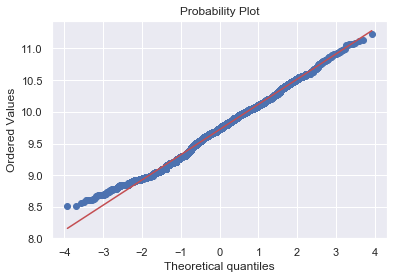

In [285]:
res=stats.probplot(np.log(df_price_dropped['price'].values), plot=plt)

In [287]:
# At this phase we will not drop any rows from original df. 
# But if do and apply a log tranf to price column it will seem lik this.

In [111]:
df.columns.get_loc('price')

52

(array([1, 2, 3, 4]), <a list of 4 Text xticklabel objects>)

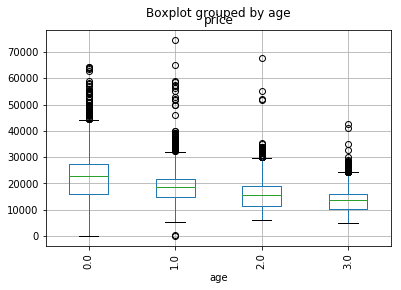

In [122]:
df.boxplot(column='price', by = 'age')
plt.xticks(rotation=90)

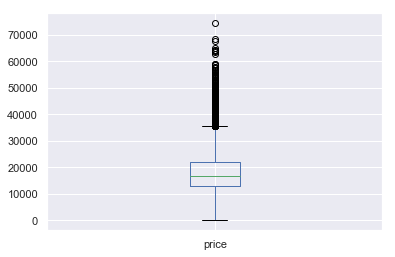

In [286]:
df.boxplot(column='price')

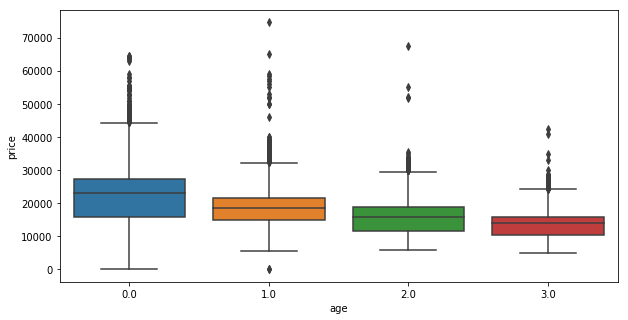

In [119]:
f, ax = plt.subplots(figsize=(10, 5))
fig = sns.boxplot(x='age', y="price", data=df)

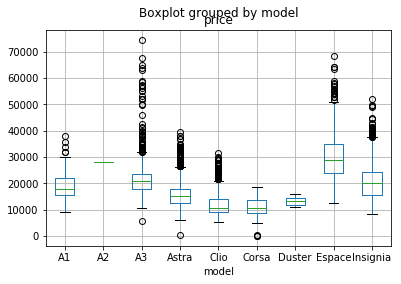

In [36]:
df.boxplot(column='price', by = 'model')

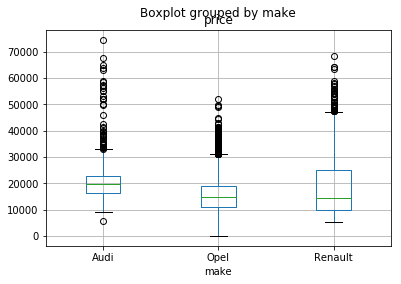

In [37]:
df.boxplot(column='price', by = 'make')

**HP**

In [40]:
df.hp.describe()

count     15831
unique       80
top          85
freq       2542
Name: hp, dtype: object

In [35]:
type(df.hp[0])

str

In [43]:
df.hp[0]

'66'

In [55]:
df['hp'] = pd.to_numeric(df.hp)

In [56]:
df.hp.describe()

count    15831.000000
mean        88.367696
std         26.835135
min          1.000000
25%         66.000000
50%         85.000000
75%        101.000000
max        294.000000
Name: hp, dtype: float64

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


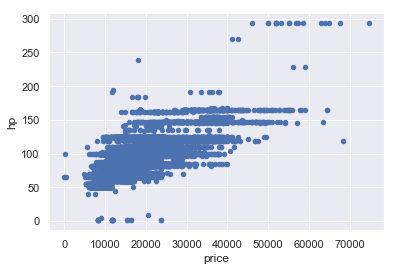

In [263]:
df.plot.scatter(x='price', y='hp')

In [262]:
print(df['price'].corr(df['hp']))

0.6938920382040906


In [57]:
df['hp_new']=df.hp

In [80]:
df.loc[(df['hp']<100), 'hp_new']=0
df.loc[((df['hp']>=100) & (df['hp']<150)), 'hp_new']=1
df.loc[((df['hp']>=150)) & ((df['hp']<200)), 'hp_new']=2
df.loc[((df['hp']>=200)) & ((df['hp']<300)), 'hp_new']=3

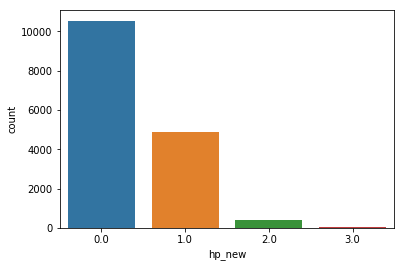

In [81]:
sns.countplot(df.hp_new)

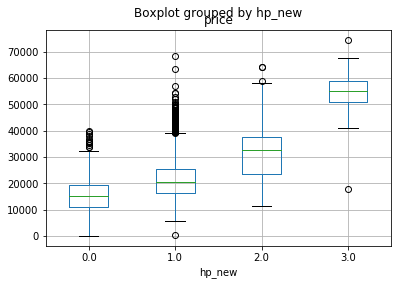

In [84]:
df.boxplot(column='price', by = 'hp_new')

**KM**

In [49]:
df.km.describe()

count     14895
unique     6689
top          10
freq       1045
Name: km, dtype: object

In [50]:
df.km.dtypes

dtype('O')

In [51]:
type(df.km[0])

str

In [39]:
df.km[0]

'56013'

In [75]:
df['km'] = pd.to_numeric(df.km)

In [62]:
df.km.describe()

count    14895.000000
mean         1.336153
std          1.242728
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: km, dtype: float64

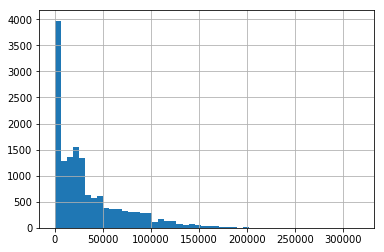

In [41]:
df['km'].hist(bins=50)

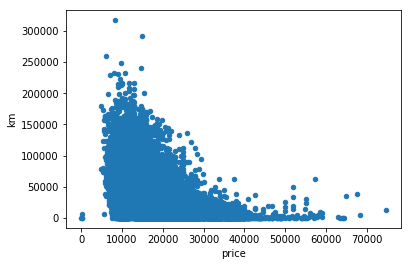

In [82]:
df.plot.scatter(x='price', y='km')

In [89]:
corr=df['price'].corr(df['km'])
print(corr)

-0.38782119044007707


In [77]:
df['km_new']=df.

In [78]:
df.loc[(df['km']<10000), 'km_new']=0
df.loc[((df['km']>=10000) & (df['km']<30000)), 'km_new']=1
df.loc[((df['km']>=30000)) & ((df['km']<60000)), 'km_new']=2
df.loc[((df['km']>=60000)) & ((df['km']<100000)), 'km_new']=3
df.loc[df['km']>=100000, 'km_new']=4

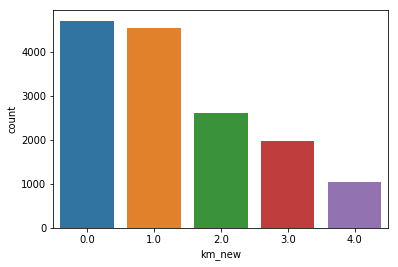

In [79]:
sns.countplot(df.km_new)

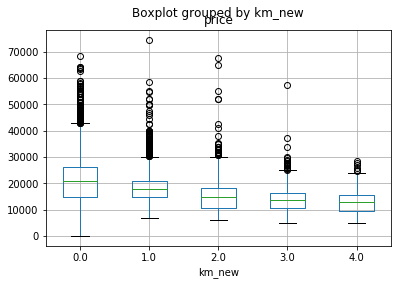

In [83]:
df.boxplot(column='price', by = 'km_new')

**AGE**

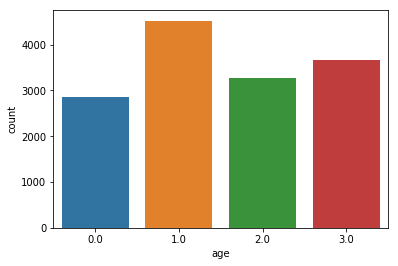

In [60]:
sns.countplot(df.age)

**CO2 EMISSION**

In [61]:
df.co2_emission.describe()

count    13483.000000
mean       117.953942
std         20.245589
min          0.000000
25%        104.000000
50%        116.000000
75%        129.000000
max        990.000000
Name: co2_emission, dtype: float64

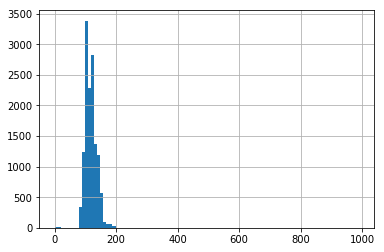

In [62]:
df['co2_emission'].hist(bins=100)

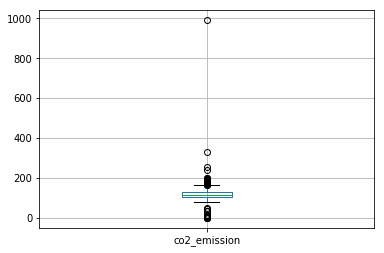

In [63]:
df.boxplot(column='co2_emission')

**GEARING TYPE**

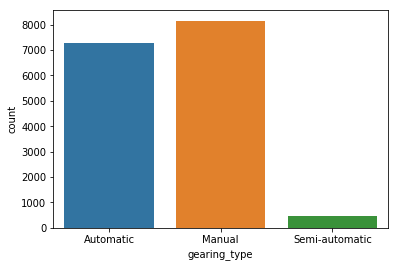

In [64]:
sns.countplot(df.gearing_type)

In [ ]:
df['gearing_type'].hist(bins=100)

**HEAT MAP**

In [250]:
columns_new=["price", "co2_emission", "make", "model", "km", "consumption_comb",
             "gearing_type", "age", "fuel", "nr_of_doors", "warranty", "hp"]
df_new=df[columns_new]

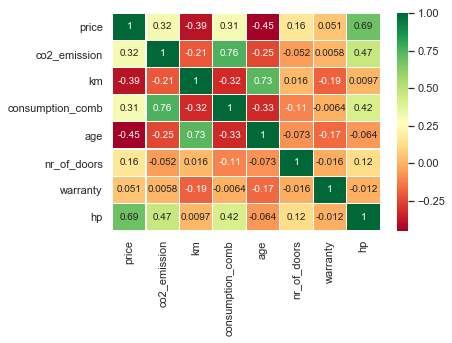

In [251]:
#plt.figure(figsize=(10,10))
sns.heatmap(df_new.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})

**PAIR PLOT**

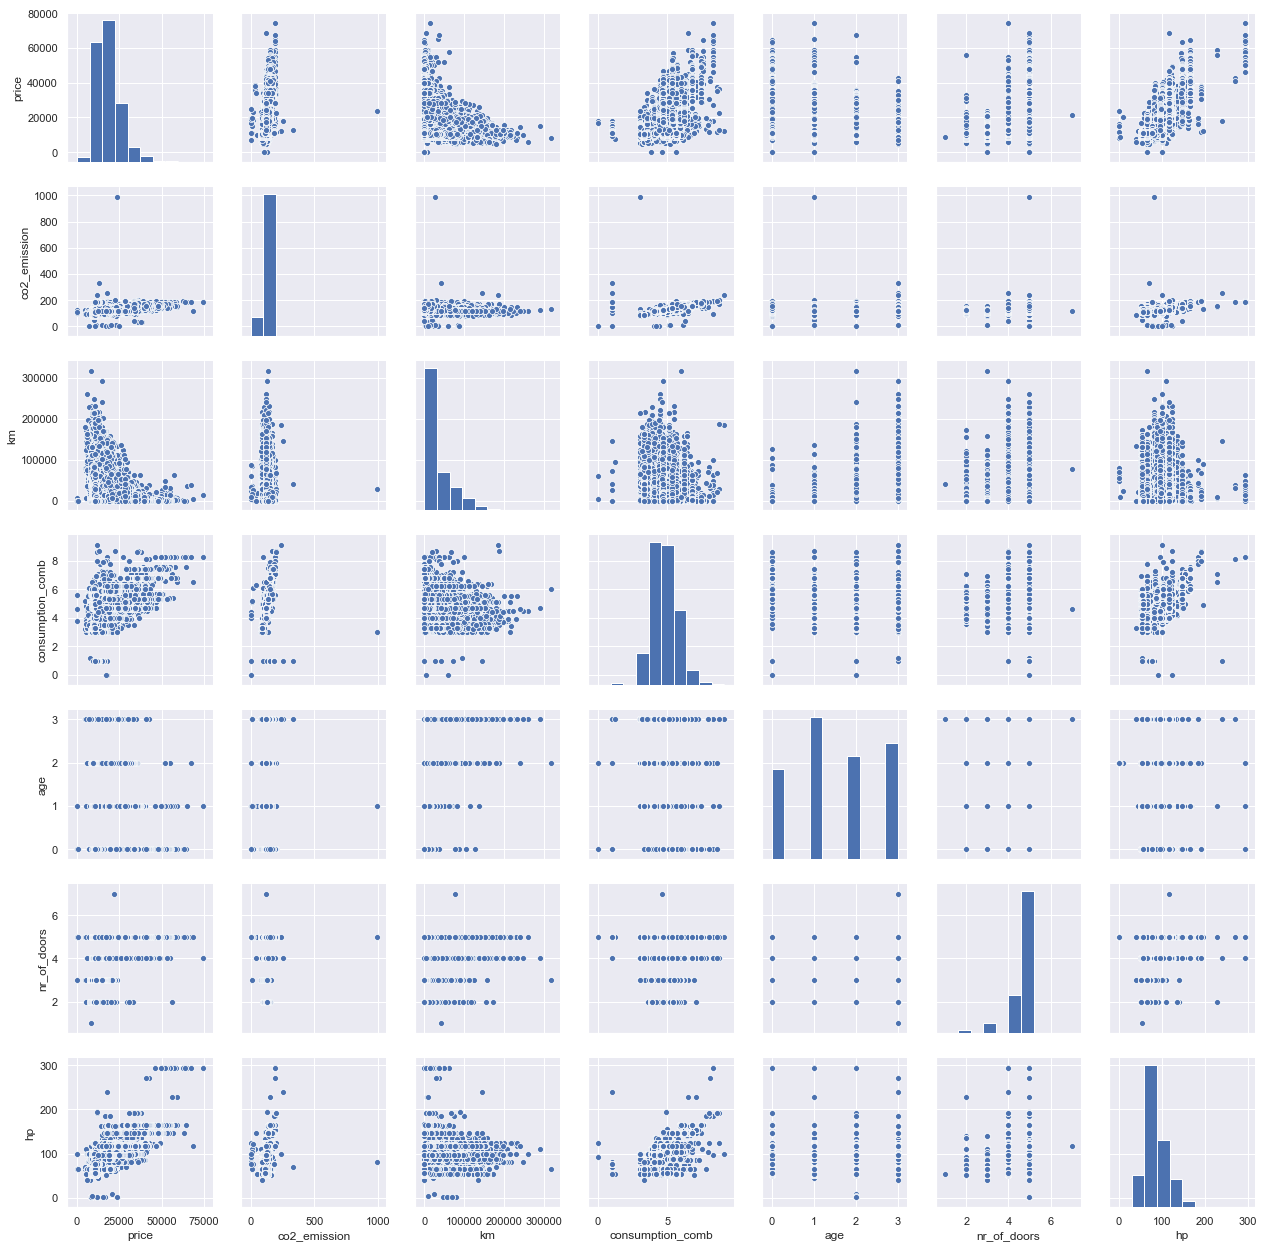

In [260]:
sns.set()
cols=["price", "co2_emission", "km", "consumption_comb",
             "gearing_type", "age", "nr_of_doors", "hp"]
sns.pairplot(df[cols], size = 2.5)
plt.show()

In [255]:
#it seems there are some outliers in co2 emission column